In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('Final_v1.csv')

In [3]:
df = df[['id', 'action_time', 'unsurity', 'structural_change',
       'long_paste', 'unproductive_time', 'external_help',
       'pasted_words_number', 'large_changes','score']]

In [4]:
df.head()

,id,action_time,unsurity,structural_change,long_paste,unproductive_time,external_help,pasted_words_number,large_changes,score
0,001519c8,12.602309,0.000000,0.000000,0.0,9.825904,0.0,0.000000,0.000000,3.5
1,0022f953,12.525951,0.000000,0.000000,0.0,9.531119,0.0,0.000000,0.000000,3.5
2,0042269b,12.950868,0.693147,1.609438,0.0,10.432703,0.0,0.000000,1.791759,6.0
3,0059420b,12.152656,0.000000,0.000000,0.0,8.027150,0.0,0.693147,0.000000,2.0
4,0075873a,12.656202,0.000000,0.000000,0.0,8.852093,0.0,0.000000,0.000000,4.0


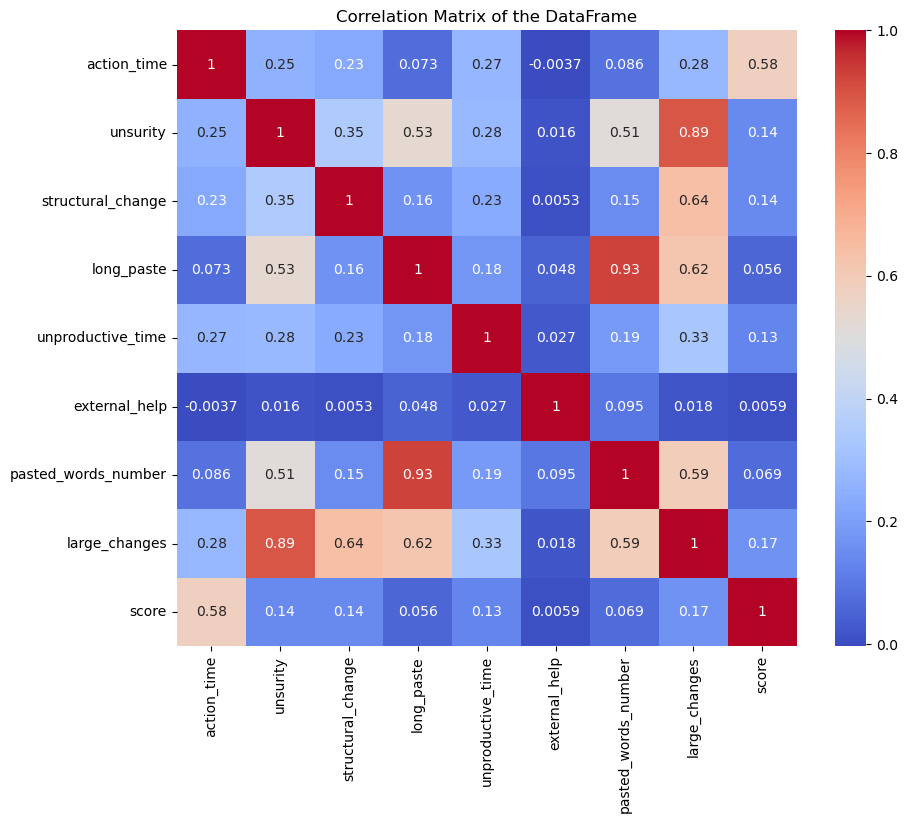

In [5]:
# Dropping the 'id' column as it's not relevant for correlation
df.drop('id', axis=1, inplace=True)

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the DataFrame')
plt.show()

In [8]:
#Baseline
RMSE_mean_Baseline = np.mean((df['score'].mean()-df['score'])**2)
print(RMSE_mean_Baseline)

1.0500717264009989


In [9]:
# Separating features and target
X = df.drop(['id','score'], axis=1)
y = df['score'].astype(str)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Splitting the dataset into the Training set and Test set with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=0)

/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


: 

In [ ]:
# Models to train: SVC, LDA, RandomForestClassifier
models = {
    "SVC": SVC(),
    "LDA": LDA(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Parameters for GridSearchCV
params = {
    "SVC": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "LDA": {'solver': ['svd', 'lsqr', 'eigen']},
    "RandomForestClassifier": {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
}

# Running GridSearchCV for each model
best_estimators = {}
for model_name in models:
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=params[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
best_estimators

{'SVC': SVC(C=10),
 'LDA': LinearDiscriminantAnalysis(),
 'RandomForestClassifier': RandomForestClassifier(max_depth=5)}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming that best_estimators contains the best models from GridSearchCV
# for RandomForestClassifier, LGBMClassifier, LogisticRegression, and KNN

# Evaluating the models
model_performance = {}
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Displaying the model performance
for model, performance in model_performance.items():
    print(f"{model} Performance:")
    for metric, score in performance.items():
        print(f"  {metric}: {score:.4f}")
    print()

SVC Performance:
  Accuracy: 0.2141
  Precision: 0.1154
  Recall: 0.2141
  F1 Score: 0.1474

LDA Performance:
  Accuracy: 0.2040
  Precision: 0.0949
  Recall: 0.2040
  F1 Score: 0.1212

RandomForestClassifier Performance:
  Accuracy: 0.2242
  Precision: 0.1558
  Recall: 0.2242
  F1 Score: 0.1644



/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
